In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
import joblib

import tensorflow as tf 
from tensorflow import keras
from keras_tuner import RandomSearch

## Data Preparation 

In [3]:
# Old Method 

# data8 = pd.read_pickle('d_data_08.pkl')
# thck8 = pd.read_pickle('d_thck_08.pkl')

# i_put_8 = []
# o_put_8 = []
# for key in data8.keys():
#     i_img_8 = data8[key]['imgs']
#     o_put_8.append(thck8[key])
#     i_put_8.append(np.array([i_img_8[k] for k in range(len(i_img_8))]))
    
# i_put_8 = np.concatenate(i_put_8) 
# o_put_8 = np.concatenate(o_put_8) 

# print(i_put_8.shape)
# print(o_put_8.shape)

# target8 = o_put_8.copy()
# images8 = i_put_8.copy()

# print(max(target8))
# min(target8)

(53576, 32, 32)
(53576,)
2.999996313


0.0

In [ ]:
def Data_Extract(data, thck):
    i_put = []
    o_put = []
    for key in data.keys():
        i_img = data[key]['imgs']
        o_put.append(thck[key])
        i_put.append(np.array([i_img[k] for k in range(len(i_img))]))

    i_put = np.concatenate(i_put) 
    o_put = np.concatenate(o_put) 

    target = o_put.copy()
    images = i_put.copy()
    
    images = images.reshape(len(images),32,32,1)
    images = images/255.0
    
    return(images,target)

In [ ]:
data8 = pd.read_pickle('d_data_08.pkl')
thck8 = pd.read_pickle('d_thck_08.pkl')

images8, target8 = Data_Extract(data8,thck8)

In [ ]:
data10 = pd.read_pickle('d_data_10.pkl')
thck10 = pd.read_pickle('d_thck_10.pkl')

images10, target10 = Data_Extract(data10,thck10)

In [ ]:
new_data8_1 = pd.read_pickle('AA_DF000644RL_0d_data_08.pkl')
new_thck8_1 = pd.read_pickle('AA_DF000644RL_0d_thck_08.pkl')

images8_AA_D, target8_AA_D = Data_Extract(new_data8_1,new_thck8_1)

In [ ]:
new_data8_2 = pd.read_pickle('1948046X_X74_DPd_data_08.pkl')
new_thck8_2 = pd.read_pickle('1948046X_X74_DPd_thck_08.pkl')

images8_X74, target8_X74 = Data_Extract(new_data8_2,new_thck8_2)

In [7]:
print(images8_AA_D.shape)
print(images8_X74.shape)

(9682, 32, 32, 1)
(17735, 32, 32, 1)


In [ ]:
images8_combine = np.append(images8,images8_AA_D,axis=0)
images8_combine = np.append(images8_combine,images8_X74,axis=0)

target8_combine = np.append(target8,target8_AA_D)
target8_combine = np.append(target8_combine,target8_X74)

print(images8_combine.shape,target8_combine.shape)

In [4]:
# For classification 

# scaler_transform_8_v2 = MinMaxScaler()
# target8_scaled = scaler_transform_8_v2.fit_transform(target8.reshape(-1,1))
# target8_scaled = target8_scaled.ravel()

In [5]:
# for Transfer Learning 

# def expand_images(images):
#     images_expand = np.expand_dims(images,-1)
#     images_expand = images_expand.repeat(3,axis=-1)
#     return images_expand 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


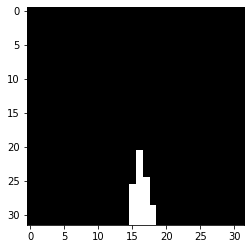

In [6]:
img = expand_images(images8)
plt.imshow(img[0])

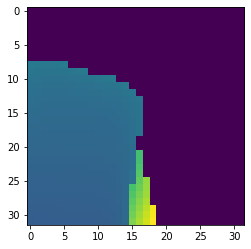

In [27]:
plt.imshow(images8[0])

In [5]:
# images8 = images8.reshape(len(images8),32,32,1)
# images8 = images8/255.0

In [9]:
x_train, x_test, y_train, y_test = train_test_split(images8_combine, target8_combine, test_size=0.20, random_state=2)

In [9]:
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(images10,target10, test_size=0.2, random_state=2)

In [ ]:
####3

In [68]:
x_train_8, x_test_8,y_train_8,y_test_8 = train_test_split(images8,target8,test_size=0.2,random_state=2)

In [67]:
y_test_8.shape

(10716,)

## Model 1 

In [50]:
model = keras.Sequential([
    keras.layers.Conv2D(filters = 32,kernel_size = (5,5), activation ='relu',input_shape=(32,32,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(filters = 128, kernel_size=(5,5), activation ='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(112,activation='relu'),
    keras.layers.Dense(1, activation= 'relu')])

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.mean_absolute_error,
             metrics = keras.metrics.mean_squared_error)


In [55]:
model.fit(x_train_8,y_train_8, epochs=10)

Epoch 1/10
1340/1340 [==============================] - 79s 59ms/step - loss: 0.2876 - mean_squared_error: 0.1599
Epoch 2/10
1340/1340 [==============================] - 79s 59ms/step - loss: 0.2777 - mean_squared_error: 0.1509
Epoch 3/10
1340/1340 [==============================] - 79s 59ms/step - loss: 0.2721 - mean_squared_error: 0.1464
Epoch 4/10
1340/1340 [==============================] - 80s 60ms/step - loss: 0.2660 - mean_squared_error: 0.1419
Epoch 5/10
1340/1340 [==============================] - 81s 60ms/step - loss: 0.2616 - mean_squared_error: 0.13770s - loss: 0.2615 - mean_squared_error: 0.
Epoch 6/10
1340/1340 [==============================] - 83s 62ms/step - loss: 0.2577 - mean_squared_error: 0.1341
Epoch 7/10
1340/1340 [==============================] - 78s 59ms/step - loss: 0.2529 - mean_squared_error: 0.13090s - loss: 0.2530 - mean_squared_error: 0.13 - ETA: 0s - loss: 0.2529 - me
Epoch 8/10
1340/1340 [==============================] - 76s 57ms/step - loss: 0.2491 -

In [69]:
model.evaluate(x_test_8,y_test_8)

335/335 [==============================] - 4s 10ms/step - loss: 0.2558 - mean_squared_error: 0.1343


[0.25577542185783386, 0.13434253633022308]

In [164]:
model.fit(x_train_8,y_train_8, epochs=20,initial_epoch=10)

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test,y_test)

In [71]:
y_pred_8 = model.predict(x_test_8)
y_pred_8 = np.hstack(y_pred_8)
y_pred_8

array([0.97064495, 1.3227816 , 0.5459496 , ..., 1.4033852 , 1.6889892 ,
       1.192502  ], dtype=float32)

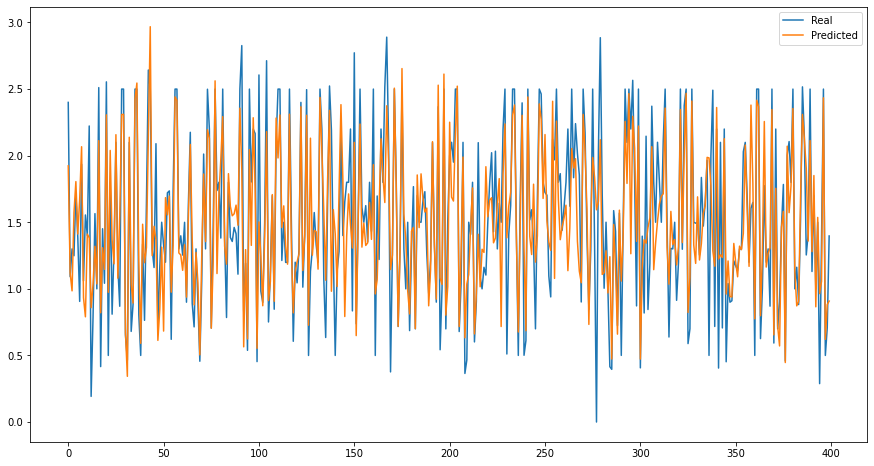

In [100]:
plt.figure(figsize=(15,8))
plt.plot(y_test_8[600:1000],label ='Real')
plt.plot(y_pred_8[600:1000],label = 'Predicted')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Count'>

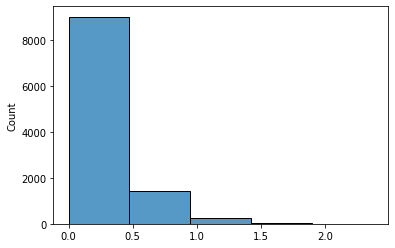

In [81]:
sns.histplot(abs(y_test_8-y_pred_8), bins =5)

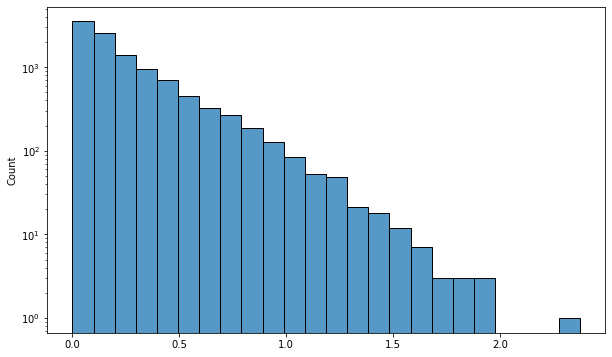

In [148]:
plt.figure(figsize=(10,6))
sns.histplot(abs((y_test_8-y_pred_8)),bins = 24)
plt.yscale("log")

## Model 2 

In [82]:
model2 = keras.Sequential([
    keras.layers.Conv2D(filters = 32,kernel_size = (5,5), activation ='relu',input_shape=(32,32,1)),
    keras.layers.MaxPooling2D((2,2)), # maxpooling2D
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(filters = 128, kernel_size=(5,5), activation ='relu'),
    keras.layers.MaxPooling2D((2,2)), # maxpooling2D
    keras.layers.Dropout(0.2),
    
#     keras.layers.Conv2D(filters = 64, kernel_size=(5,5), activation ='relu'),
#     keras.layers.MaxPooling2D((2,2)),
#     keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(112,activation='relu'),
    keras.layers.Dense(32,activation='relu'),#32
    keras.layers.Dense(1, activation= 'relu')])

model2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.mean_absolute_error,
             metrics = keras.metrics.mean_squared_error)

In [83]:
#0.26
model2.fit(x_train_8,y_train_8, epochs=10)

Epoch 1/10
1340/1340 [==============================] - 68s 50ms/step - loss: 0.4937 - mean_squared_error: 0.3785
Epoch 2/10
1340/1340 [==============================] - 65s 48ms/step - loss: 0.4189 - mean_squared_error: 0.2906
Epoch 3/10
1340/1340 [==============================] - 66s 49ms/step - loss: 0.3734 - mean_squared_error: 0.2468
Epoch 4/10
1340/1340 [==============================] - 67s 50ms/step - loss: 0.3400 - mean_squared_error: 0.2157
Epoch 5/10
1340/1340 [==============================] - 67s 50ms/step - loss: 0.3132 - mean_squared_error: 0.1925
Epoch 6/10
1340/1340 [==============================] - 67s 50ms/step - loss: 0.2919 - mean_squared_error: 0.1743
Epoch 7/10
1340/1340 [==============================] - 68s 51ms/step - loss: 0.2743 - mean_squared_error: 0.1582
Epoch 8/10
1340/1340 [==============================] - 67s 50ms/step - loss: 0.2618 - mean_squared_error: 0.1480
Epoch 9/10
1340/1340 [==============================] - 71s 53ms/step - loss: 0.2501 - m

In [90]:
model2.fit(x_train_8,y_train_8, epochs=20,initial_epoch=10)

Epoch 11/20
1340/1340 [==============================] - 84s 63ms/step - loss: 0.2298 - mean_squared_error: 0.1218
Epoch 12/20
1340/1340 [==============================] - 81s 60ms/step - loss: 0.2204 - mean_squared_error: 0.1152
Epoch 13/20
1340/1340 [==============================] - 81s 61ms/step - loss: 0.2134 - mean_squared_error: 0.1093
Epoch 14/20
1340/1340 [==============================] - 81s 61ms/step - loss: 0.2071 - mean_squared_error: 0.1050
Epoch 15/20
1340/1340 [==============================] - 82s 61ms/step - loss: 0.2026 - mean_squared_error: 0.1021
Epoch 16/20
1340/1340 [==============================] - 82s 61ms/step - loss: 0.1961 - mean_squared_error: 0.0970
Epoch 17/20
1340/1340 [==============================] - 82s 61ms/step - loss: 0.1928 - mean_squared_error: 0.09473s - loss: 0.1924 - mean_squared_error:  - ETA: 0s - loss: 0.1928 - mean_squared_err
Epoch 18/20
1340/1340 [==============================] - 86s 64ms/step - loss: 0.1897 - mean_squared_error: 0.0

KeyboardInterrupt: 

In [91]:
model2.evaluate(x_test_8, y_test_8)#10 epochs

335/335 [==============================] - 5s 15ms/step - loss: 0.2043 - mean_squared_error: 0.1100


[0.2042785882949829, 0.11002867668867111]

In [22]:
model2.evaluate(x_test, y_test)#20 epochs

335/335 [==============================] - 9s 26ms/step - loss: 0.2046 - mean_squared_error: 0.1094


[0.2046365886926651, 0.10944419354200363]

In [166]:
model2.evaluate(x_test_8, y_test_8)#40 epochs

335/335 [==============================] - 4s 11ms/step - loss: 0.2043 - mean_squared_error: 0.1100


[0.2042785882949829, 0.11002867668867111]

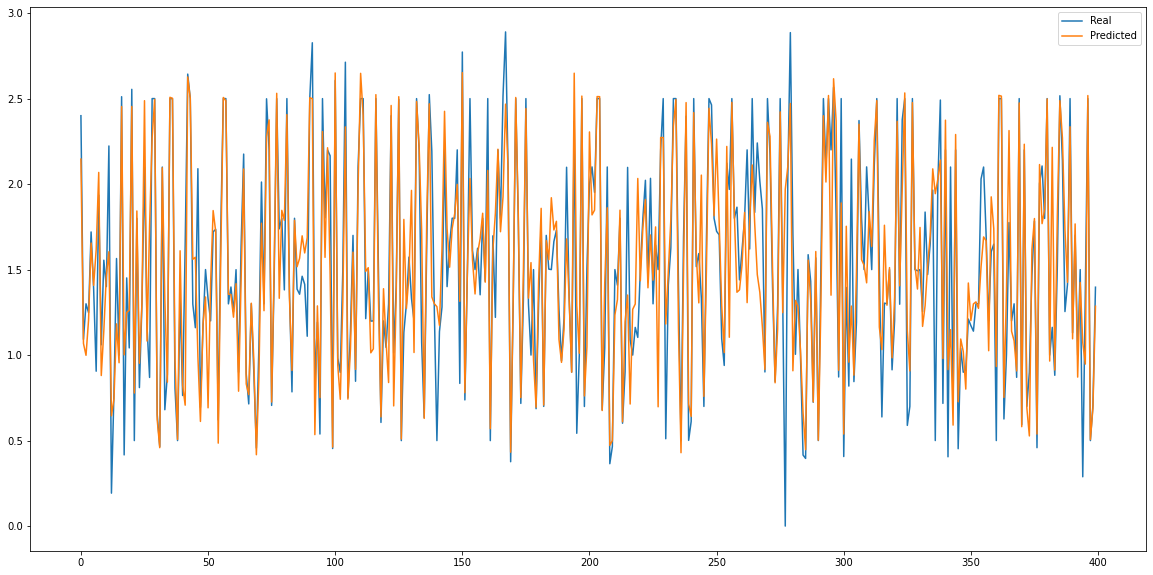

In [99]:
y_pred_8_2 = model2.predict(x_test_8)

plt.figure(figsize=(20,10))
plt.plot(y_test_8[600:1000],label='Real')
plt.plot(y_pred_8_2[600:1000], label = 'Predicted')
plt.legend()
plt.show()

In [102]:
y_pred_8_2

array([[0.953138 ],
       [1.4365023],
       [0.6396744],
       ...,
       [1.9448876],
       [1.8213023],
       [1.0333694]], dtype=float32)

In [105]:
y_test_8.reshape(-1,1)

array([[0.99996114],
       [0.83675155],
       [0.17912176],
       ...,
       [1.89889605],
       [1.45727765],
       [1.05585865]])

<AxesSubplot:ylabel='Count'>

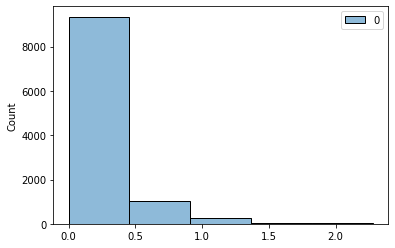

In [106]:
sns.histplot(abs(y_test_8.reshape(-1,1)-y_pred_8_2), bins =5)

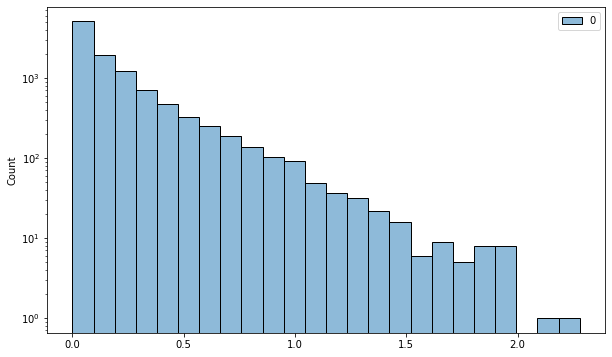

In [147]:
plt.figure(figsize=(10,6))
sns.histplot(abs(y_test_8.reshape(-1,1)-y_pred_8_2), bins =24)
#plt.xlim(0,1.6)
plt.yscale("log")


In [44]:
print(mean_absolute_error(model2.predict(x_train),y_train))
mean_absolute_error(y_test,y_pred)

0.16004100013048173


0.21418812823862637

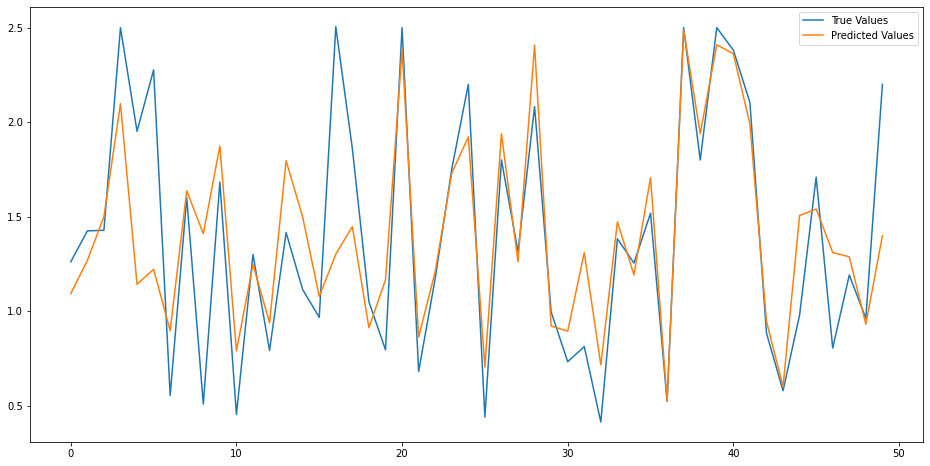

In [39]:
plt.figure(figsize=(16,8))
plt.plot(y_test[150:200], label = 'True Values')
plt.plot(y_pred[150:200], label= 'Predicted Values')
plt.legend()
plt.show()

In [27]:
y_train

array([0.86809834, 2.19984735, 1.30006181, ..., 2.50511721, 1.34431529,
       1.09722739])

## Model 3 

In [ ]:
# model3 one 
## conv1 - 96, filter - 5 
## conv2 - 128, filter - 5 
## Dense - 256, 112
## 30 Epochs
## Training - mae - 0.1749, mse - 0.0781 
## Testing - mae - 0.19836097955703735, mse - 0.10086175799369812

In [150]:
model3 = keras.Sequential([
    keras.layers.Conv2D(filters = 128,kernel_size = (5,5), activation ='relu',input_shape=(32,32,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(filters = 128, kernel_size=(5,5), activation ='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(112,activation='relu'),
    keras.layers.Dense(1, activation= 'relu')])

model3.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.mean_absolute_error,
             metrics = keras.metrics.mean_squared_error)

In [151]:
model3.fit(x_train_1,y_train_1,epochs=10)

Epoch 1/10
1340/1340 [==============================] - 269s 200ms/step - loss: 0.4874 - mean_squared_error: 0.3737
Epoch 2/10
1340/1340 [==============================] - 262s 196ms/step - loss: 0.4038 - mean_squared_error: 0.2744
Epoch 3/10
1340/1340 [==============================] - 261s 195ms/step - loss: 0.3586 - mean_squared_error: 0.2315
Epoch 4/10
1340/1340 [==============================] - 262s 195ms/step - loss: 0.3254 - mean_squared_error: 0.2007
Epoch 5/10
1340/1340 [==============================] - 263s 196ms/step - loss: 0.2999 - mean_squared_error: 0.1784
Epoch 6/10
1340/1340 [==============================] - 264s 197ms/step - loss: 0.2808 - mean_squared_error: 0.1615
Epoch 7/10
1340/1340 [==============================] - 262s 196ms/step - loss: 0.2657 - mean_squared_error: 0.1487
Epoch 8/10
1340/1340 [==============================] - 241s 180ms/step - loss: 0.2544 - mean_squared_error: 0.1388
Epoch 9/10
1340/1340 [==============================] - 222s 166ms/step 

In [152]:
model3.evaluate(x_test_1,y_test_1)

335/335 [==============================] - 11s 33ms/step - loss: 0.2426 - mean_squared_error: 0.1341


[0.24263641238212585, 0.13410934805870056]

In [153]:
model3.fit(x_train_1,y_train_1,epochs=20,initial_epoch= 10)

Epoch 11/20
1340/1340 [==============================] - 226s 169ms/step - loss: 0.2274 - mean_squared_error: 0.1170
Epoch 12/20
1340/1340 [==============================] - 226s 169ms/step - loss: 0.2212 - mean_squared_error: 0.1123
Epoch 13/20
1340/1340 [==============================] - 222s 165ms/step - loss: 0.2143 - mean_squared_error: 0.1071
Epoch 14/20
1340/1340 [==============================] - 222s 165ms/step - loss: 0.2085 - mean_squared_error: 0.1031 - loss: 0.2085 - mean_squared_e
Epoch 15/20
1340/1340 [==============================] - 224s 167ms/step - loss: 0.2029 - mean_squared_error: 0.0983
Epoch 16/20
1340/1340 [==============================] - 225s 168ms/step - loss: 0.1982 - mean_squared_error: 0.0951
Epoch 17/20
1340/1340 [==============================] - 224s 167ms/step - loss: 0.1943 - mean_squared_error: 0.0915
Epoch 18/20
1340/1340 [==============================] - 225s 168ms/step - loss: 0.1922 - mean_squared_error: 0.0905
Epoch 19/20
1340/1340 [=========

In [154]:
model3.evaluate(x_test_1,y_test_1)

335/335 [==============================] - 11s 34ms/step - loss: 0.2063 - mean_squared_error: 0.1083


[0.20628908276557922, 0.10827720910310745]

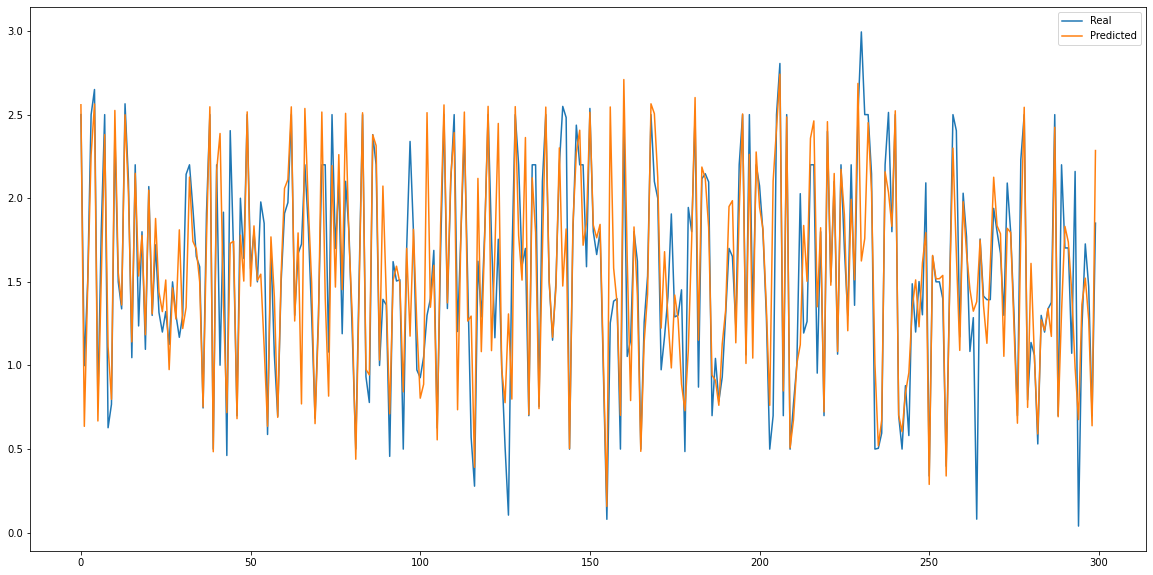

In [157]:
y_pred_3 = model3.predict(x_test_1)
plt.figure(figsize=(20,10))
plt.plot(y_test_1[700:1000],label ='Real')
plt.plot(y_pred_3[700:1000],label='Predicted')
plt.legend()
plt.show()

In [161]:
y_test_1.reshape(-1,1)

array([[2.20000602],
       [1.30041095],
       [2.14072725],
       ...,
       [1.50003089],
       [1.20011534],
       [1.80011082]])

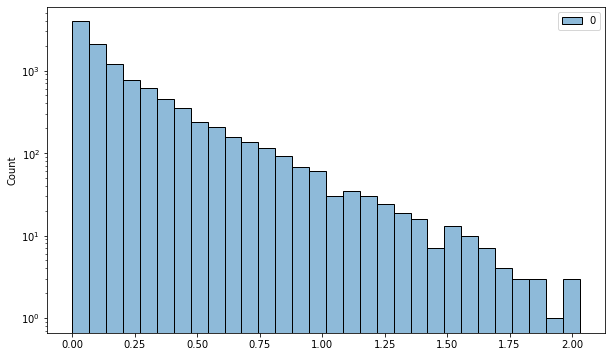

In [163]:
plt.figure(figsize=(10,6))
sns.histplot(abs(y_test_1.reshape(-1,1) - y_pred_3),bins = 30)
#plt.xlim(0,1.6)
plt.yscale("log")

## Model4 

In [9]:
model4 = keras.Sequential([
    keras.layers.Conv2D(filters = 160,kernel_size = (5,5), activation ='relu',input_shape=(32,32,1)),
    keras.layers.MaxPooling2D((2,2)), # maxpooling2D
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(filters = 160, kernel_size=(5,5), activation ='relu'),
    keras.layers.MaxPooling2D((2,2)), # maxpooling2D
    keras.layers.Dropout(0.2),
    
#     keras.layers.Conv2D(filters = 64, kernel_size=(5,5), activation ='relu'),
#     keras.layers.MaxPooling2D((2,2)),
#     keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(112,activation='relu'),
    keras.layers.Dense(32,activation='relu'),#32
    keras.layers.Dense(1, activation= 'relu')])

model4.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.mean_absolute_error,
             metrics = keras.metrics.mean_squared_error)

In [10]:
model4.fit(x_train_1,y_train_1,epochs=10)

Epoch 1/10
1340/1340 [==============================] - 285s 212ms/step - loss: 0.4947 - mean_squared_error: 0.3802
Epoch 2/10
1340/1340 [==============================] - 285s 213ms/step - loss: 0.4157 - mean_squared_error: 0.2884
Epoch 3/10
1340/1340 [==============================] - 287s 214ms/step - loss: 0.3709 - mean_squared_error: 0.2449
Epoch 4/10
1340/1340 [==============================] - 294s 219ms/step - loss: 0.3396 - mean_squared_error: 0.2153
Epoch 5/10
1340/1340 [==============================] - 338s 252ms/step - loss: 0.3116 - mean_squared_error: 0.1897
Epoch 6/10
1340/1340 [==============================] - 334s 250ms/step - loss: 0.2889 - mean_squared_error: 0.1703
Epoch 7/10
1340/1340 [==============================] - 335s 250ms/step - loss: 0.2701 - mean_squared_error: 0.1547
Epoch 8/10
1340/1340 [==============================] - 335s 250ms/step - loss: 0.2544 - mean_squared_error: 0.1413
Epoch 9/10
1340/1340 [==============================] - 334s 249ms/step 

In [11]:
model4.evaluate(x_test_1,y_test_1)

335/335 [==============================] - 22s 66ms/step - loss: 0.2305 - mean_squared_error: 0.1290


[0.23046788573265076, 0.1289987862110138]

In [24]:
model4.fit(x_train_1,y_train_1,epochs=50, initial_epoch =30)

Epoch 31/50
1340/1340 [==============================] - 342s 255ms/step - loss: 0.1434 - mean_squared_error: 0.0600
Epoch 32/50
1340/1340 [==============================] - 339s 253ms/step - loss: 0.1427 - mean_squared_error: 0.0602
Epoch 33/50
1340/1340 [==============================] - 341s 254ms/step - loss: 0.1411 - mean_squared_error: 0.0593
Epoch 34/50
1340/1340 [==============================] - 340s 254ms/step - loss: 0.1403 - mean_squared_error: 0.0596
Epoch 35/50
1340/1340 [==============================] - 340s 254ms/step - loss: 0.1382 - mean_squared_error: 0.0574
Epoch 36/50
1340/1340 [==============================] - 342s 255ms/step - loss: 0.1361 - mean_squared_error: 0.0562
Epoch 37/50
1340/1340 [==============================] - 328s 245ms/step - loss: 0.1360 - mean_squared_error: 0.0564
Epoch 38/50
1340/1340 [==============================] - 303s 226ms/step - loss: 0.1337 - mean_squared_error: 0.0547
Epoch 39/50
1340/1340 [==============================] - 307s 22

In [25]:
model4.evaluate(x_test_1,y_test_1)

335/335 [==============================] - 22s 65ms/step - loss: 0.1637 - mean_squared_error: 0.0869


[0.16366218030452728, 0.0868888646364212]

In [26]:
model4.evaluate(images10,target10)

1675/1675 [==============================] - 109s 65ms/step - loss: 0.1119 - mean_squared_error: 0.0467s - loss: 0.1118 - mean_squar


[0.11188904941082001, 0.046670135110616684]

In [27]:
model4.evaluate(images8,target8)

1675/1675 [==============================] - 108s 65ms/step - loss: 0.2240 - mean_squared_error: 0.1357


[0.2239902913570404, 0.1356804072856903]

In [28]:
#model4.save('1.1MAE_Model')

INFO:tensorflow:Assets written to: 1.1MAE_Model\assets


In [44]:
#model4.save('Cnn_regression_4thModel')

INFO:tensorflow:Assets written to: Cnn_regression_4thModel\assets


In [ ]:
### Testing

In [10]:
test_model = keras.models.load_model('1.1MAE_Model')
test_model.evaluate(x_test_1,y_test_1)

335/335 [==============================] - 30s 87ms/step - loss: 0.1637 - mean_squared_error: 0.0869


[0.16366218030452728, 0.0868888646364212]

In [11]:
test_model2 = keras.models.load_model('Cnn_regression_4thModel')
test_model2.evaluate(x_test_1, y_test_1)

335/335 [==============================] - 17s 50ms/step - loss: 0.1454 - mean_squared_error: 0.0630


[0.14537636935710907, 0.06301823258399963]

In [12]:
y_pred = test_model.predict(x_test_1)
plt.figure(figsize=(16,8))
plt.plot(y_test_1,label = 'Real Values')
plt.plot(y_pred, label = 'Predicted Values')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
y_pred2 = test_model2.predict(x_test_1)
plt.figure(figsize=(16,8))
plt.plot(y_test_1[:100],label = 'Real Values')
plt.plot(y_pred2[:100], label = 'Predicted Values')
plt.Axes()
plt.legend()
plt.show()

In [36]:
print(test_model2.evaluate(images8_new_1,target8_new_1))
y_pred_new_1 = test_model2.predict(images8_new_1)

303/303 [==============================] - 13s 44ms/step - loss: 0.5792 - mean_squared_error: 0.5517
[0.5792128443717957, 0.551657497882843]


In [37]:
print(test_model2.evaluate(images8_new_2,target8_new_2))
y_pred_new_2 = test_model2.predict(images8_new_2)

555/555 [==============================] - 24s 43ms/step - loss: 0.4220 - mean_squared_error: 0.3039
[0.4219771921634674, 0.30386435985565186]


## 5th Model(Updated 4th model)

In [ ]:
work from here 

In [17]:
model5 = keras.Sequential([
    keras.layers.Conv2D(filters = 160,kernel_size = (5,5), activation ='relu',input_shape=(32,32,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(filters = 160, kernel_size=(3,3), activation ='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    
#     keras.layers.Conv2D(filters = 96, kernel_size=(5,5), activation ='relu'),
#     keras.layers.MaxPooling2D((2,2)),
#     keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(192,activation='relu'),
    keras.layers.Dense(240,activation='relu'),
    keras.layers.Dense(240,activation='relu'),
    keras.layers.Dense(1, activation= 'relu')])

model5.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.mean_absolute_error,
             metrics = keras.metrics.mean_squared_error)

In [18]:
model5.fit(x_train,y_train,epochs=10)

Epoch 1/10
2025/2025 [==============================] - 310s 153ms/step - loss: 0.4606 - mean_squared_error: 0.3458
Epoch 2/10
2025/2025 [==============================] - 290s 143ms/step - loss: 0.3880 - mean_squared_error: 0.2678
Epoch 3/10
2025/2025 [==============================] - 347s 171ms/step - loss: 0.3473 - mean_squared_error: 0.2277
Epoch 4/10
 261/2025 [==>...........................] - ETA: 5:26 - loss: 0.3245 - mean_squared_error: 0.2048

KeyboardInterrupt: 

In [14]:
# MAAE score with 10 epochs 
model5.evaluate(x_test,y_test)

507/507 [==============================] - 13s 25ms/step - loss: 0.2682 - mean_squared_error: 0.1581


[0.2682095766067505, 0.1581481248140335]

In [15]:
model5.fit(x_train,y_train,initial_epoch=10, epochs=20)

Epoch 11/20
2025/2025 [==============================] - 219s 108ms/step - loss: 0.2473 - mean_squared_error: 0.1370
Epoch 12/20
2025/2025 [==============================] - 246s 121ms/step - loss: 0.2414 - mean_squared_error: 0.1322
Epoch 13/20
2025/2025 [==============================] - 246s 122ms/step - loss: 0.2369 - mean_squared_error: 0.1282
Epoch 14/20
2025/2025 [==============================] - 248s 122ms/step - loss: 0.2312 - mean_squared_error: 0.1235
Epoch 15/20
2025/2025 [==============================] - 249s 123ms/step - loss: 0.2281 - mean_squared_error: 0.1211
Epoch 16/20
2025/2025 [==============================] - 248s 122ms/step - loss: 0.2229 - mean_squared_error: 0.1164
Epoch 17/20
2025/2025 [==============================] - 249s 123ms/step - loss: 0.2191 - mean_squared_error: 0.1135
Epoch 18/20
2025/2025 [==============================] - 250s 123ms/step - loss: 0.2166 - mean_squared_error: 0.1108
Epoch 19/20
2025/2025 [==============================] - 251s 12

In [16]:
# MAAE score with 25 epochs 
model5.evaluate(x_test,y_test)

507/507 [==============================] - 15s 29ms/step - loss: 0.2323 - mean_squared_error: 0.13160s - loss: 0.2320 - mean_squar


[0.23233531415462494, 0.13164350390434265]

In [36]:
model5.fit(x_train,y_train,initial_epoch = 20, epochs = 30)

Epoch 21/30
2025/2025 [==============================] - 154s 76ms/step - loss: 0.2175 - mean_squared_error: 0.1147
Epoch 22/30
2025/2025 [==============================] - 156s 77ms/step - loss: 0.2156 - mean_squared_error: 0.1134
Epoch 23/30
2025/2025 [==============================] - 156s 77ms/step - loss: 0.2132 - mean_squared_error: 0.1117
Epoch 24/30
2025/2025 [==============================] - 158s 78ms/step - loss: 0.2111 - mean_squared_error: 0.1095
Epoch 25/30
2025/2025 [==============================] - 157s 78ms/step - loss: 0.2081 - mean_squared_error: 0.1074
Epoch 26/30
2025/2025 [==============================] - 156s 77ms/step - loss: 0.2062 - mean_squared_error: 0.1057
Epoch 27/30
2025/2025 [==============================] - 157s 77ms/step - loss: 0.2032 - mean_squared_error: 0.1033
Epoch 28/30
2025/2025 [==============================] - 157s 78ms/step - loss: 0.2013 - mean_squared_error: 0.1015
Epoch 29/30
2025/2025 [==============================] - 157s 77ms/step 

In [37]:
model5.evaluate(x_test,y_test)

507/507 [==============================] - 12s 25ms/step - loss: 0.2308 - mean_squared_error: 0.1330


[0.23077112436294556, 0.13297729194164276]

In [38]:
model5.save('Data_8_combined_model_23.0')

INFO:tensorflow:Assets written to: Data_8_combined_model_23.0\assets


In [172]:
Cnn_regression_4thModel = keras.models.load_model('Cnn_regression_4thModel')
Cnn_regression_4thModel.evaluate(x_test_1,y_test_1)

335/335 [==============================] - 20s 58ms/step - loss: 0.1454 - mean_squared_error: 0.0630


[0.14537636935710907, 0.06301823258399963]

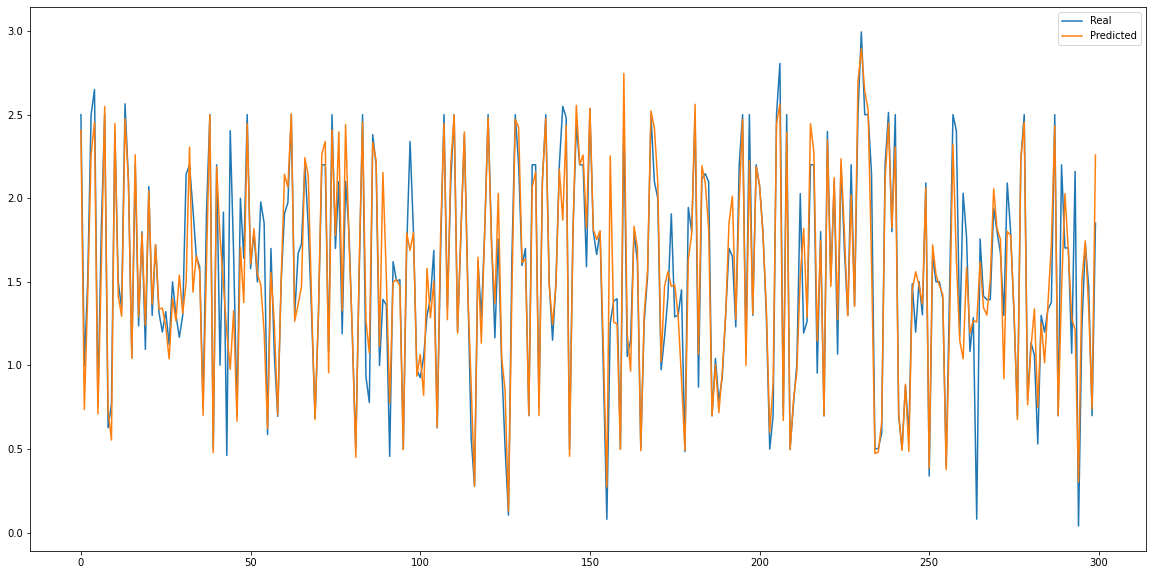

In [174]:
y_pred_1 = Cnn_regression_4thModel.predict(x_test_1)
plt.figure(figsize=(20,10))
plt.plot(y_test_1[700:1000],label ='Real')
plt.plot(y_pred_1[700:1000],label='Predicted')
plt.legend()
plt.show()

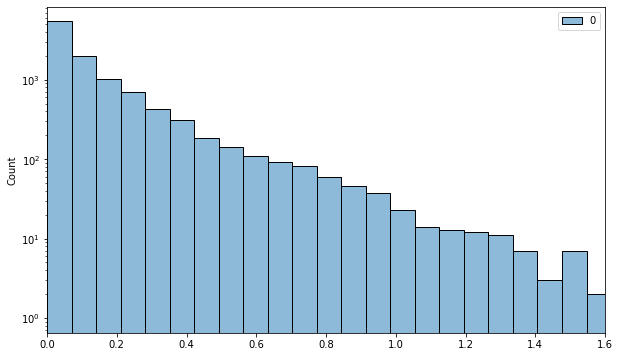

In [135]:
#residual_1 = y_test_1.reshape(-1,1)-y_pred_1
# print(sns.histplot(abs(residual_1),bins = 30))
# plt.xlim(0,1.6)

plt.figure(figsize=(10,6))
sns.histplot(abs(residual_1),bins = 30)
plt.xlim(0,1.6)
plt.yscale("log")

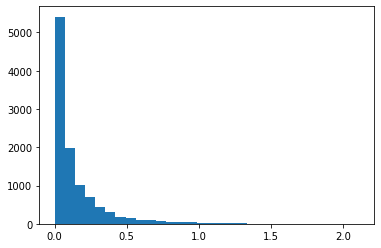

In [118]:
plt.hist(abs(residual_1), bins = 30)
plt.show()

In [15]:
model_1_1 = keras.models.load_model('1.1MAE_Model')
model_1_1.evaluate(x_test_1,y_test_1)

335/335 [==============================] - 19s 56ms/step - loss: 0.1637 - mean_squared_error: 0.0869


[0.16366218030452728, 0.0868888646364212]

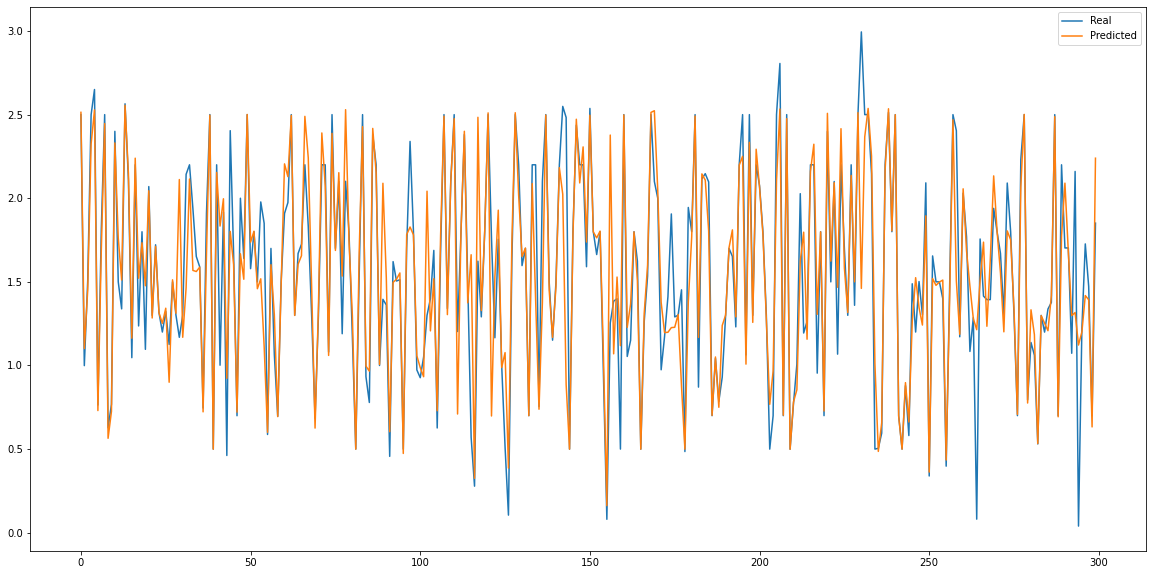

In [175]:
#y_pred_2 = model_1_1.predict(x_test_1)

plt.figure(figsize=(20,10))
plt.plot(y_test_1[700:1000],label ='Real')
plt.plot(y_pred_2[700:1000],label='Predicted')
plt.legend()
plt.show()

In [16]:
model_1_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 192)       4992      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 192)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 192)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 160)       768160    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 160)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 160)        

<AxesSubplot:ylabel='Count'>

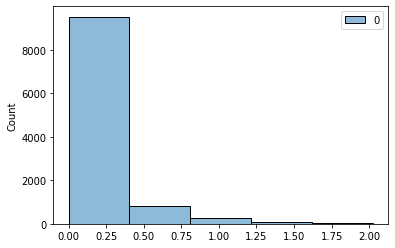

In [43]:
residual_2 = y_test_1.reshape(-1,1)-y_pred_2
residual_2
sns.histplot(abs(residual_2),bins = 5)

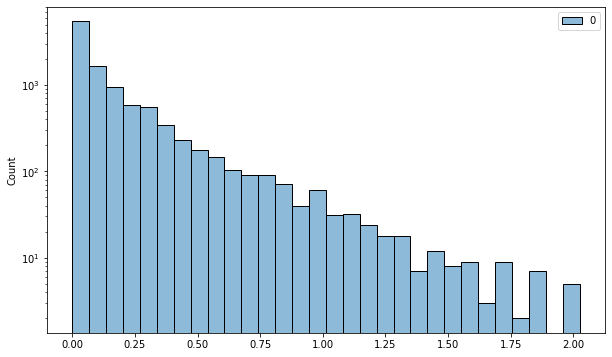

In [132]:
plt.figure(figsize=(10,6))
sns.histplot(abs(residual_2),bins = 30)
#plt.xlim(0,1.6)
plt.yscale("log")

In [ ]:
#residual_1 = y_pred_1-y_test_1
residual_1

In [38]:
y_test_1-y_pred_1.reshape(1,-1)

array([[-0.11079095,  0.00696847,  0.96993932, ..., -0.03887711,
         0.03796746, -0.04409897]])

In [37]:
y_pred_1.reshape(1,-1)

array([[2.310797 , 1.2934425, 1.1707879, ..., 1.538908 , 1.1621479,
        1.8442098]], dtype=float32)

## model 6

In [48]:
from func_lenet import LeNet

In [49]:
lenet_model = LeNet((8, 16, 32), (24, 12, 6, 2), 5, 0.75)

In [58]:
lenet_model.summary()

Model: "le_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inp_lyr (ConvoBlock)        multiple                  208       
                                                                 
 convo_block0 (ConvoBlock)   multiple                  3216      
                                                                 
 convo_block1 (ConvoBlock)   multiple                  12832     
                                                                 
 flatten_7 (Flatten)         multiple                  0         
                                                                 
 dense_block0 (DenseBlock)   multiple                  792       
                                                                 
 dense_block1 (DenseBlock)   multiple                  300       
                                                                 
 dense_block2 (DenseBlock)   multiple                  78   

In [55]:
lenet_model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
                     loss = keras.losses.mean_absolute_error,
                     metrics = keras.metrics.mean_squared_error)

In [59]:
lenet_model.fit(x_train_1,y_train_1,epochs=5)

Epoch 1/5
1340/1340 [==============================] - 29s 22ms/step - loss: 0.5528 - mean_squared_error: 0.4493 ETA: 0s - loss: 0.5
Epoch 2/5
1340/1340 [==============================] - 28s 21ms/step - loss: 0.5358 - mean_squared_error: 0.4140
Epoch 3/5
1340/1340 [==============================] - 29s 21ms/step - loss: 0.5345 - mean_squared_error: 0.4111
Epoch 4/5
1340/1340 [==============================] - 29s 21ms/step - loss: 0.5345 - mean_squared_error: 0.4111
Epoch 5/5
1340/1340 [==============================] - 29s 22ms/step - loss: 0.5345 - mean_squared_error: 0.4110


### Shriram Model 

In [45]:
s_model = keras.models.load_model('Le_Net_Regression_20220331_1648')
s_model.summary()

Model: "le_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inp_lyr (ConvoBlock)        multiple                  208       
                                                                 
 convo_block0 (ConvoBlock)   multiple                  3216      
                                                                 
 convo_block1 (ConvoBlock)   multiple                  12832     
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense_block0 (DenseBlock)   multiple                  792       
                                                                 
 dense_block1 (DenseBlock)   multiple                  300       
                                                                 
 dense_block2 (DenseBlock)   multiple                  78   

In [46]:
s_model.evaluate(x_test,y_test)

507/507 [==============================] - 4s 8ms/step - loss: 3081.4500 - MAE: 55.5075


[3081.449951171875, 55.50749206542969]

In [47]:
s_model.evaluate(x_train,y_train)

2025/2025 [==============================] - 15s 8ms/step - loss: 3080.9263 - MAE: 55.5027


[3080.92626953125, 55.502716064453125]

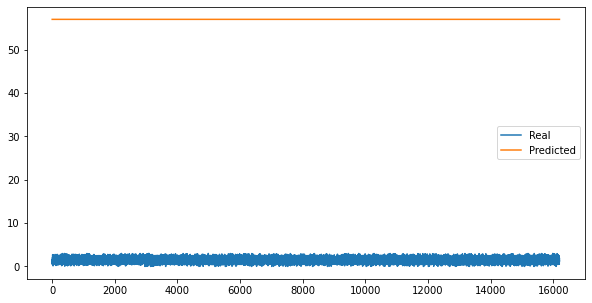

In [50]:
y_pred = s_model.predict(x_test)
plt.figure(figsize=(10,5))
plt.plot(y_test,label = 'Real')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.show()

### hyperparameter tunning 

In [20]:
def hyper_model(hp):
    model = keras.Sequential([
    keras.layers.Conv2D( filters=hp.Int('conv_1_filter', min_value=32, max_value=192, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
        
    keras.layers.Conv2D( filters=hp.Int('conv_2_filter', min_value=32, max_value=192, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
        
              
    keras.layers.Flatten(),
      
    keras.layers.Dense(units=hp.Int('dense_1_units', min_value=32, max_value=256, step=16),activation='relu'),
    keras.layers.Dense(units=hp.Int('dense_2_units', min_value=32, max_value=256, step=16),activation='relu'),
    keras.layers.Dense(units=hp.Int('dense_2_units', min_value=32, max_value=256, step=16),activation='relu'),

    keras.layers.Dense(1, activation='relu')])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.mean_absolute_error,
              metrics= keras.metrics.mean_absolute_error)
    return model

In [21]:
best_model = RandomSearch(hyper_model,objective='mean_absolute_error',max_trials = 20, directory = 'hyperparameter_models',project_name='New_data8_Regression')

INFO:tensorflow:Reloading Oracle from existing project hyperparameter_models\New_data8_Regression\oracle.json
INFO:tensorflow:Reloading Tuner from hyperparameter_models\New_data8_Regression\tuner0.json


In [42]:
best_model.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 17 Complete [00h 35m 38s]
mean_absolute_error: 0.3162124752998352

Best mean_absolute_error So Far: 0.30464470386505127
Total elapsed time: 06h 29m 20s

Search: Running Trial #18

Hyperparameter    |Value             |Best Value So Far 
conv_1_filter     |112               |80                
conv_1_kernel     |5                 |5                 
conv_2_filter     |176               |80                
conv_2_kernel     |3                 |3                 
dense_1_units     |160               |192               
dense_2_units     |80                |240               

Epoch 1/5
2025/2025 [==============================] - 260s 128ms/step - loss: 0.4630 - mean_absolute_error: 0.4630 - val_loss: 0.4113 - val_mean_absolute_error: 0.4113
Epoch 2/5
2025/2025 [==============================] - 264s 130ms/step - loss: 0.3963 - mean_absolute_error: 0.3963 - val_loss: 0.3630 - val_mean_absolute_error: 0.3630
Epoch 3/5
1062/2025 [==============>...............] - ETA: 2:00 - loss: 0.3

KeyboardInterrupt: 

In [22]:
model_hyp = best_model.get_best_models()[0]
model_hyp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 80)        2080      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 80)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 80)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 80)        57680     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 80)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 80)          0

In [23]:
model_hyp.evaluate(x_test,y_test)

507/507 [==============================] - 9s 18ms/step - loss: 0.3091 - mean_absolute_error: 0.3091


[0.3091171979904175, 0.3091171979904175]

In [24]:
model_hyp.fit(x_train,y_train,initial_epoch=5,epochs=15)

Epoch 6/15
2025/2025 [==============================] - 150s 74ms/step - loss: 0.2909 - mean_absolute_error: 0.2909
Epoch 7/15
2025/2025 [==============================] - 150s 74ms/step - loss: 0.2804 - mean_absolute_error: 0.2804
Epoch 8/15
2025/2025 [==============================] - 150s 74ms/step - loss: 0.2707 - mean_absolute_error: 0.2707
Epoch 9/15
2025/2025 [==============================] - 151s 75ms/step - loss: 0.2622 - mean_absolute_error: 0.2622
Epoch 10/15
2025/2025 [==============================] - 152s 75ms/step - loss: 0.2554 - mean_absolute_error: 0.2554
Epoch 11/15
2025/2025 [==============================] - 152s 75ms/step - loss: 0.2486 - mean_absolute_error: 0.2486
Epoch 12/15
2025/2025 [==============================] - 149s 73ms/step - loss: 0.2430 - mean_absolute_error: 0.2430
Epoch 13/15
2025/2025 [==============================] - 132s 65ms/step - loss: 0.2385 - mean_absolute_error: 0.2385
Epoch 14/15
2025/2025 [==============================] - 134s 66ms/s

In [25]:
model_hyp.evaluate(x_test,y_test)

507/507 [==============================] - 7s 14ms/step - loss: 0.2450 - mean_absolute_error: 0.2450


[0.24503850936889648, 0.24503850936889648]

In [28]:
model_hyp.fit(x_train,y_train,initial_epoch=20,epochs=30)

Epoch 21/30
2025/2025 [==============================] - 127s 63ms/step - loss: 0.2085 - mean_absolute_error: 0.2085
Epoch 22/30
2025/2025 [==============================] - 129s 64ms/step - loss: 0.2047 - mean_absolute_error: 0.2047
Epoch 23/30
2025/2025 [==============================] - 130s 64ms/step - loss: 0.2028 - mean_absolute_error: 0.2028
Epoch 24/30
2025/2025 [==============================] - 134s 66ms/step - loss: 0.2010 - mean_absolute_error: 0.20105s - loss: 0.
Epoch 25/30
2025/2025 [==============================] - 151s 74ms/step - loss: 0.1990 - mean_absolute_error: 0.1990
Epoch 26/30
2025/2025 [==============================] - 151s 74ms/step - loss: 0.1969 - mean_absolute_error: 0.1969
Epoch 27/30
2025/2025 [==============================] - 152s 75ms/step - loss: 0.1932 - mean_absolute_error: 0.1932
Epoch 28/30
2025/2025 [==============================] - 154s 76ms/step - loss: 0.1927 - mean_absolute_error: 0.1927
Epoch 29/30
2025/2025 [============================

In [29]:
model_hyp.evaluate(x_test,y_test)

507/507 [==============================] - 9s 17ms/step - loss: 0.2259 - mean_absolute_error: 0.2259


[0.2258530557155609, 0.2258530557155609]